# Truck 2: GPS Speed vs. Wheel-Based Speed

#### Imports and global variables are defined here.

In [7]:
# Imports required for this notebook.
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import datetime

# Local path to the CSV file containing the data for truck two (2).
truckTwoPath = "../data/trucks/truck2.csv"

# Local path to the column dictionary for truck two (2).
truckTwoDictPath = "../data/dictionary/truck2dict.csv"

#If the number of values that are NOT Na type pass this percentage, the row will be deleted
rowNaNThresholdPercent = 75

#### Functions are defined here.
*NOTE: We need to discuss reusable code and how we're going to handle commonly-used functions.*

In [3]:
"""Uses Pandas's read_csv method to read a CSV file and returns a DataFrame of it to the notebook.
This function reads in all rows and defines the header row at index 0 by default."""
def readCsv(truck, records = None, headerIdx = 0):
    return pd.read_csv(truck, nrows = records, header = [headerIdx])

"""Creates a Python dictionary from a pre-defined CSV dictionary.
This will only look at the first two columns of the given CSV file."""
def createPythonDictionary(dictionaryCSV):
    # Initialize the resulting dictionary.
    dictResult = {}
    
    # Opens the passed in CSV which defines the rename dictionary and iterates through it to store each value into a Python dictionary.
    with open(dictionaryCSV, 'r') as f:
        for row in csv.reader(f):
            dictResult.update({row[0]:row[1]})
    return dictResult

"""Returns a DataFrame without the UTC columns. Specific to the given Volvo truck data."""
def cullUtcCols(truckData):
    noUTC = truckData.drop(["UTC hour", "UTC minute", "UTC second", "UTC month", "UTC day", "UTC year"], axis = 1)
    return noUTC

"""Takes a DataFrame and a dictionary as parameters; uses the dictionary to rename all matching columns then
returns the changed DataFrame."""
def renameColumns(dataFrame, dictionary):
    return dataFrame.rename(columns = dictionary)

"""Finds threshold of Non-NA type using percentage and deletes rows."""
def removeUnnecessaryRows(dataFrame):
    length = len(dataFrame.columns)
    TValue = (rowNaNThresholdPercent / 100) * length
    #print("Threshold value: " + str(int(TValue)))
    return dataFrame.dropna(thresh = int(TValue))

"""Finds columns with all Na types and deletes them."""
def removeUnnecessaryColumns(dataFrame):
    return dataFrame.dropna(axis=1, how='all')

def divideByDay(truck_df, byday_df = None):
    dates = []
    #truck_df = truck_df.head()
    for index, tdata in truck_df.iterrows():
        dates.append(tdata['Time (DateTime)'].split(' ')[0])
        #print(index, dates)
        
    truck_df['Time (DateTime)'] = dates
    
    if(byday_df):
        byday_df = truck_df.groupby('Time (DateTime)')[byday_df].mean()
    else:
        byday_df = truck_df.groupby('Time (DateTime)').mean()

    return byday_df

#### Notebook driver script from here on.

Reading in the truck data; one can change how many records are read by using "records = <#>" in the readCsv function or remove it entirely to read all records.

In [4]:
truckTwoDf = readCsv(truckTwoPath)
truckTwoDf.head()

,Time,C_1115_1_Alternator_250A,C_1115_2_BattOut_100A,C_1115_3_Fridge_20A,C_1115_4_Trailer_50A,C_1115_5_Inventer_100A,TotalVehicleDistanceHighRes,EngineSpeed,WheelBasedVehicleSpeed,asu_UreaTankTemp,...,tse_TurboSpeed,CPU load,UTC hour,UTC minute,UTC second,UTC month,UTC day,UTC year,GPS altitude,GPS speed
0,03/11/2019 14:49:09.038,-35.452125,4.949645,0.555047,-0.430114,-2.283131,NaN,1096.375,106.886719,NaN,...,NaN,75.0,18.0,49.0,11.0,3.0,11.0,19.0,337.5,29.323334
1,03/11/2019 14:49:09.138,-35.480735,5.270085,0.626764,-0.420577,-2.294575,NaN,1098.875,107.101562,NaN,...,NaN,75.0,18.0,49.0,11.0,3.0,11.0,19.0,337.5,29.323334
2,03/11/2019 14:49:09.238,-35.480735,5.197604,0.568780,-62.500000,-2.271687,NaN,1096.750,107.089844,NaN,...,NaN,75.0,18.0,49.0,11.0,3.0,11.0,19.0,337.5,29.323334
3,03/11/2019 14:49:09.338,-35.452125,5.418860,0.638209,-62.500000,-2.290761,411617045.0,1098.375,106.921875,NaN,...,NaN,75.0,18.0,49.0,11.0,3.0,11.0,19.0,337.5,29.323334
4,03/11/2019 14:49:09.438,-35.471199,5.228122,0.590143,-62.500000,-2.283131,411617045.0,1101.750,107.109375,NaN,...,NaN,75.0,18.0,49.0,11.0,3.0,11.0,19.0,337.5,29.323334


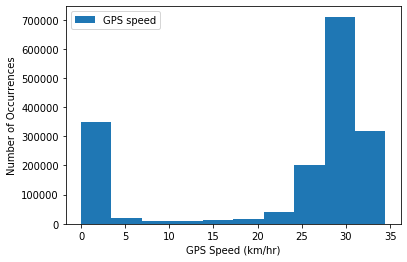

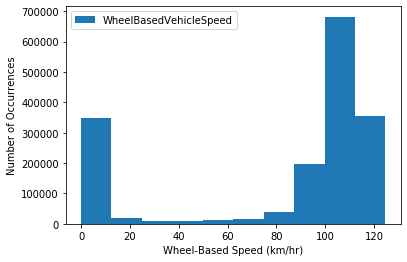

In [5]:
columns = ['GPS speed', 'WheelBasedVehicleSpeed']
gpsSpeedHist = truckTwoDf[['GPS speed']].plot.hist(stacked=True)
gpsSpeedHist.set_xlabel('GPS Speed (km/hr)')
gpsSpeedHist.set_ylabel('Number of Occurrences')

wheelSpeedHist = truckTwoDf[['WheelBasedVehicleSpeed']].plot.hist(stacked=True)
wheelSpeedHist.set_xlabel('Wheel-Based Speed (km/hr)')
wheelSpeedHist.set_ylabel('Number of Occurrences')

gpsSpeedHist
wheelSpeedHist

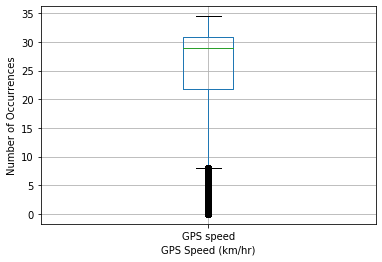

In [11]:
gpsSpeedBox = truckTwoDf[['GPS speed']].boxplot()
gpsSpeedBox.set_xlabel('GPS Speed (km/hr)')
gpsSpeedBox.set_ylabel('Number of Occurrences')

gpsSpeedBox

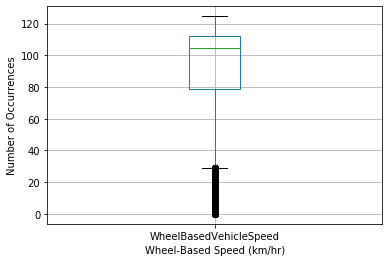

In [12]:
wheelSpeedBox = truckTwoDf[['WheelBasedVehicleSpeed']].boxplot()
wheelSpeedBox.set_xlabel('Wheel-Based Speed (km/hr)')
wheelSpeedBox.set_ylabel('Number of Occurrences')

wheelSpeedBox

It's clear that both of these components have a similar trend; there is definitely a skewness to them. However, upon further inspection, the GPS Speed has a different scale on its x-axis. These are both supposed to be measured in km/hr.

It's possible that:
- The provided units for GPS Speed were incorrect.
- The GPS Speed unit is configured to a different unit of measurement (accidental or intentional).
  - Note: we have not yet found a conversion that matches the readings.
- The GPS Speed unit was incorrectly set up.

We can also see that there is a significant amount of readings near zero. We hypothesize that these values are from moments of inactivity, such as stopping at a light or leaving the truck on without moving. Outlier detection is currently being developed and will hopefully snuff these values out.

Dropping UTC columns.

In [ ]:
truckTwoDf = cullUtcCols(truckTwoDf)
#truckTwoDf.head()

Renaming the columns for better readability.

In [ ]:
# Create a Python dictionary out of the CSV dictionary.
truckTwoDict = createPythonDictionary(truckTwoDictPath)

truckTwoDf = removeUnnecessaryRows(truckTwoDf)
truckTwoDf = renameColumns(truckTwoDf, truckTwoDict)
truckTwoDf = removeUnnecessaryColumns(truckTwoDf)

truckTwoDf = renameColumns(truckTwoDf, truckTwoDict)
truckTwoDf.head()

##### GPS Speed vs. Wheel-Based Speed
Selecting the GPS Speed and Wheel-Based Speed columns and using the divideByDay function to display the average speeds per day.

In [ ]:
columns = ['Speed (km/hr)', 'Vehicle Speed (Wheel-Based; km/hr)']
y = truckTwoDf[columns]
x = truckTwoDf['Time (DateTime)']
test.plot()

In [ ]:
columns = ['Speed (km/hr)', 'Vehicle Speed (Wheel-Based; km/hr)']
speedsByDay = divideByDay(truckTwoDf, columns)
speedsByDay

In [ ]:
speedsByDay.plot()

In [ ]:
speedsByDay['Difference in Speeds (km/hr)'] = (speedsByDay['Speed (km/hr)'] - speedsByDay['Vehicle Speed (Wheel-Based; km/hr)']).abs()
speedsByDay

In [ ]:
speedsByDay.plot()